<a href="https://colab.research.google.com/github/sutirach1/pm/blob/main/PM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
data_url='https://raw.githubusercontent.com/sutirach1/pm/main/bangkok-air-quality.csv'
data=pd.read_csv(data_url, parse_dates=['date'], na_values=[' '], skipinitialspace=True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2021-10-01,58.0,24.0,11.0,5.0,NaN,NaN
1,2021-10-02,57.0,37.0,23.0,7.0,1.0,NaN
2,2021-10-03,70.0,NaN,NaN,NaN,NaN,NaN
3,2021-09-01,62.0,25.0,12.0,6.0,NaN,NaN
4,2021-09-02,55.0,20.0,6.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...
2822,2015-03-15,NaN,NaN,23.0,13.0,3.0,9.0
2823,2014-11-30,NaN,NaN,40.0,36.0,4.0,11.0
2824,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
2825,2014-01-26,NaN,NaN,54.0,53.0,6.0,18.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2827 non-null   datetime64[ns]
 1   pm25    1883 non-null   float64       
 2   pm10    2812 non-null   float64       
 3   o3      2813 non-null   float64       
 4   no2     2814 non-null   float64       
 5   so2     1980 non-null   float64       
 6   co      963 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 154.7 KB


In [13]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm25,pm10,o3,no2,so2,co
0,2013-12-31,NaN,NaN,68.0,33.0,3.0,7.0
1,2014-01-01,NaN,84.0,90.0,48.0,5.0,16.0
2,2014-01-02,NaN,84.0,119.0,63.0,7.0,14.0
3,2014-01-03,NaN,103.0,95.0,57.0,7.0,13.0
4,2014-01-04,NaN,101.0,52.0,34.0,1.0,NaN
...,...,...,...,...,...,...,...
2822,2021-09-29,98.0,39.0,13.0,9.0,1.0,NaN
2823,2021-09-30,80.0,28.0,8.0,4.0,NaN,NaN
2824,2021-10-01,58.0,24.0,11.0,5.0,NaN,NaN
2825,2021-10-02,57.0,37.0,23.0,7.0,1.0,NaN


In [14]:
y_col='pm25'

In [15]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm25,pm10,o3,no2,so2,co
0,2016-07-30,61.0,19.0,17.0,15.0,8.0,6.0
1,2016-07-31,68.0,24.0,25.0,13.0,7.0,6.0
2,2016-08-01,60.0,20.0,26.0,14.0,2.0,6.0
3,2016-08-02,68.0,25.0,21.0,14.0,7.0,6.0
4,2016-08-03,70.0,26.0,23.0,16.0,2.0,6.0
...,...,...,...,...,...,...,...
1878,2021-09-29,98.0,39.0,13.0,9.0,1.0,NaN
1879,2021-09-30,80.0,28.0,8.0,4.0,NaN,NaN
1880,2021-10-01,58.0,24.0,11.0,5.0,NaN,NaN
1881,2021-10-02,57.0,37.0,23.0,7.0,1.0,NaN


In [16]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [17]:
date_parts(data)

In [20]:
data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'year', 'month',
       'day', 'day_name'],
      dtype='object')

In [47]:

df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2016-07-30,2016,7,30,Saturday,61.0
1,2016-07-31,2016,7,31,Sunday,68.0
2,2016-08-01,2016,8,1,Monday,60.0
3,2016-08-02,2016,8,2,Tuesday,68.0
4,2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...,...
1878,2021-09-29,2021,9,29,Wednesday,98.0
1879,2021-09-30,2021,9,30,Thursday,80.0
1880,2021-10-01,2021,10,1,Friday,58.0
1881,2021-10-02,2021,10,2,Saturday,57.0


In [48]:
df=df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2016-07-30,2016,7,30,Saturday,61.0
2016-07-31,2016,7,31,Sunday,68.0
2016-08-01,2016,8,1,Monday,60.0
2016-08-02,2016,8,2,Tuesday,68.0
2016-08-03,2016,8,3,Wednesday,70.0
...,...,...,...,...,...
2021-09-29,2021,9,29,Wednesday,98.0
2021-09-30,2021,9,30,Thursday,80.0
2021-10-01,2021,10,1,Friday,58.0


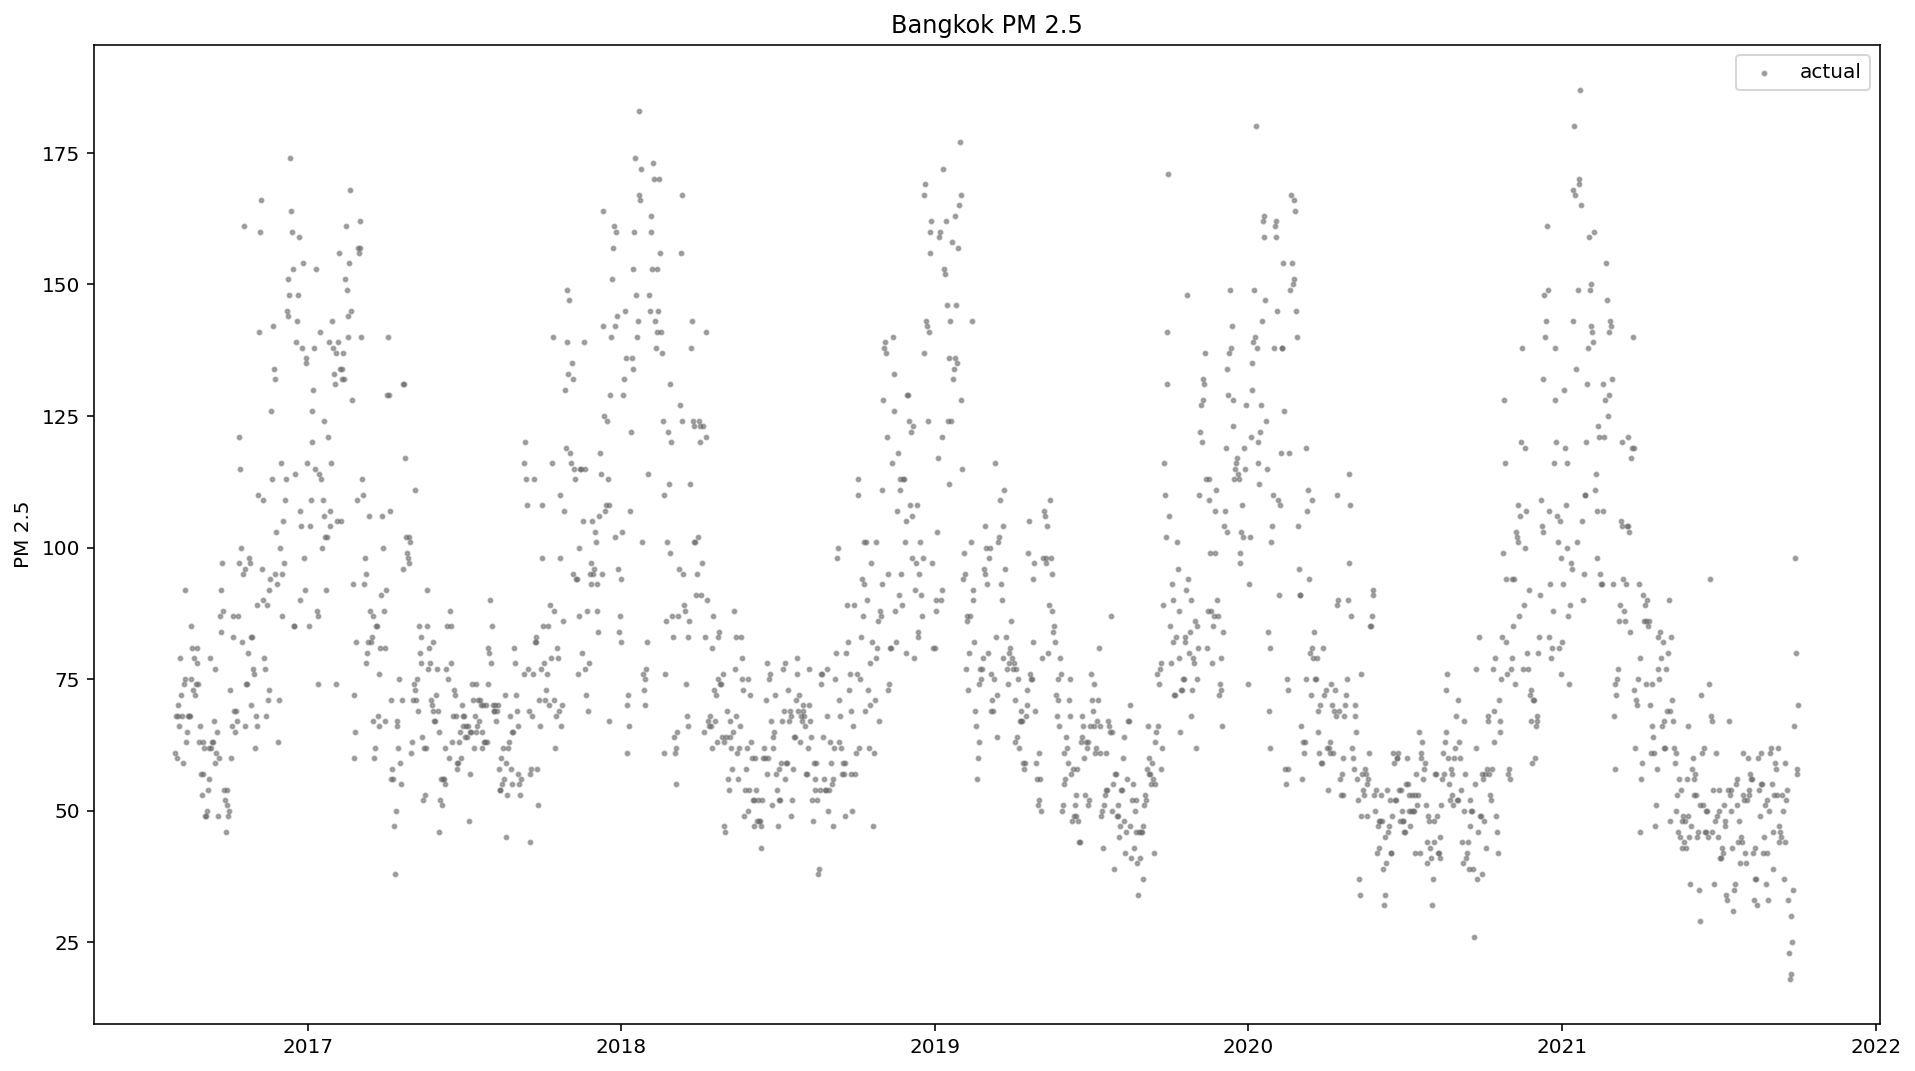

In [49]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();

In [51]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [26]:
split_at=1400
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [27]:

import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 2.2.3


In [28]:
reg = lgb.LGBMRegressor()

In [29]:
reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [30]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [31]:

fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
reg.fit(X_train, y_train, **fit_params)

Training until validation scores don't improve for 200 rounds.
[10]	valid_0's l2: 555.45
[20]	valid_0's l2: 423.77
[30]	valid_0's l2: 388.96
[40]	valid_0's l2: 392.212
[50]	valid_0's l2: 393.59
[60]	valid_0's l2: 389.45
[70]	valid_0's l2: 384.723
[80]	valid_0's l2: 386.392
[90]	valid_0's l2: 395.912
[100]	valid_0's l2: 396.239
Did not meet early stopping. Best iteration is:
[74]	valid_0's l2: 382.565


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [32]:
reg.__dict__

{'_Booster': <lightgbm.basic.Booster at 0x7f102ce33750>,
 '_best_iteration': 74,
 '_best_score': defaultdict(dict, {'valid_0': {'l2': 382.5649339491475}}),
 '_classes': None,
 '_evals_result': {'valid_0': defaultdict(list,
              {'l2': [1114.6894335155375,
                993.1206551393947,
                895.0348727798793,
                817.2269076110839,
                750.8655099724114,
                698.2879670590587,
                654.2882067602844,
                619.4018893835297,
                588.0551670627178,
                555.4500910072297,
                535.0215354915157,
                519.3470229666506,
                498.2598731748439,
                484.3005577557596,
                473.23109901280253,
                462.63718085368316,
                449.44089011660844,
                438.67167385334227,
                430.4795810939924,
                423.77021103444355,
                419.21840916837937,
                416.875964718

In [33]:
reg.score(X_train, y_train)

0.7581550700580437

In [34]:

reg.score(X_test, y_test)

0.6144743705441345

In [35]:
reg.predict(X_test[:5])

array([53.51406679, 55.91813136, 57.31425474, 52.04120973, 49.54910744])

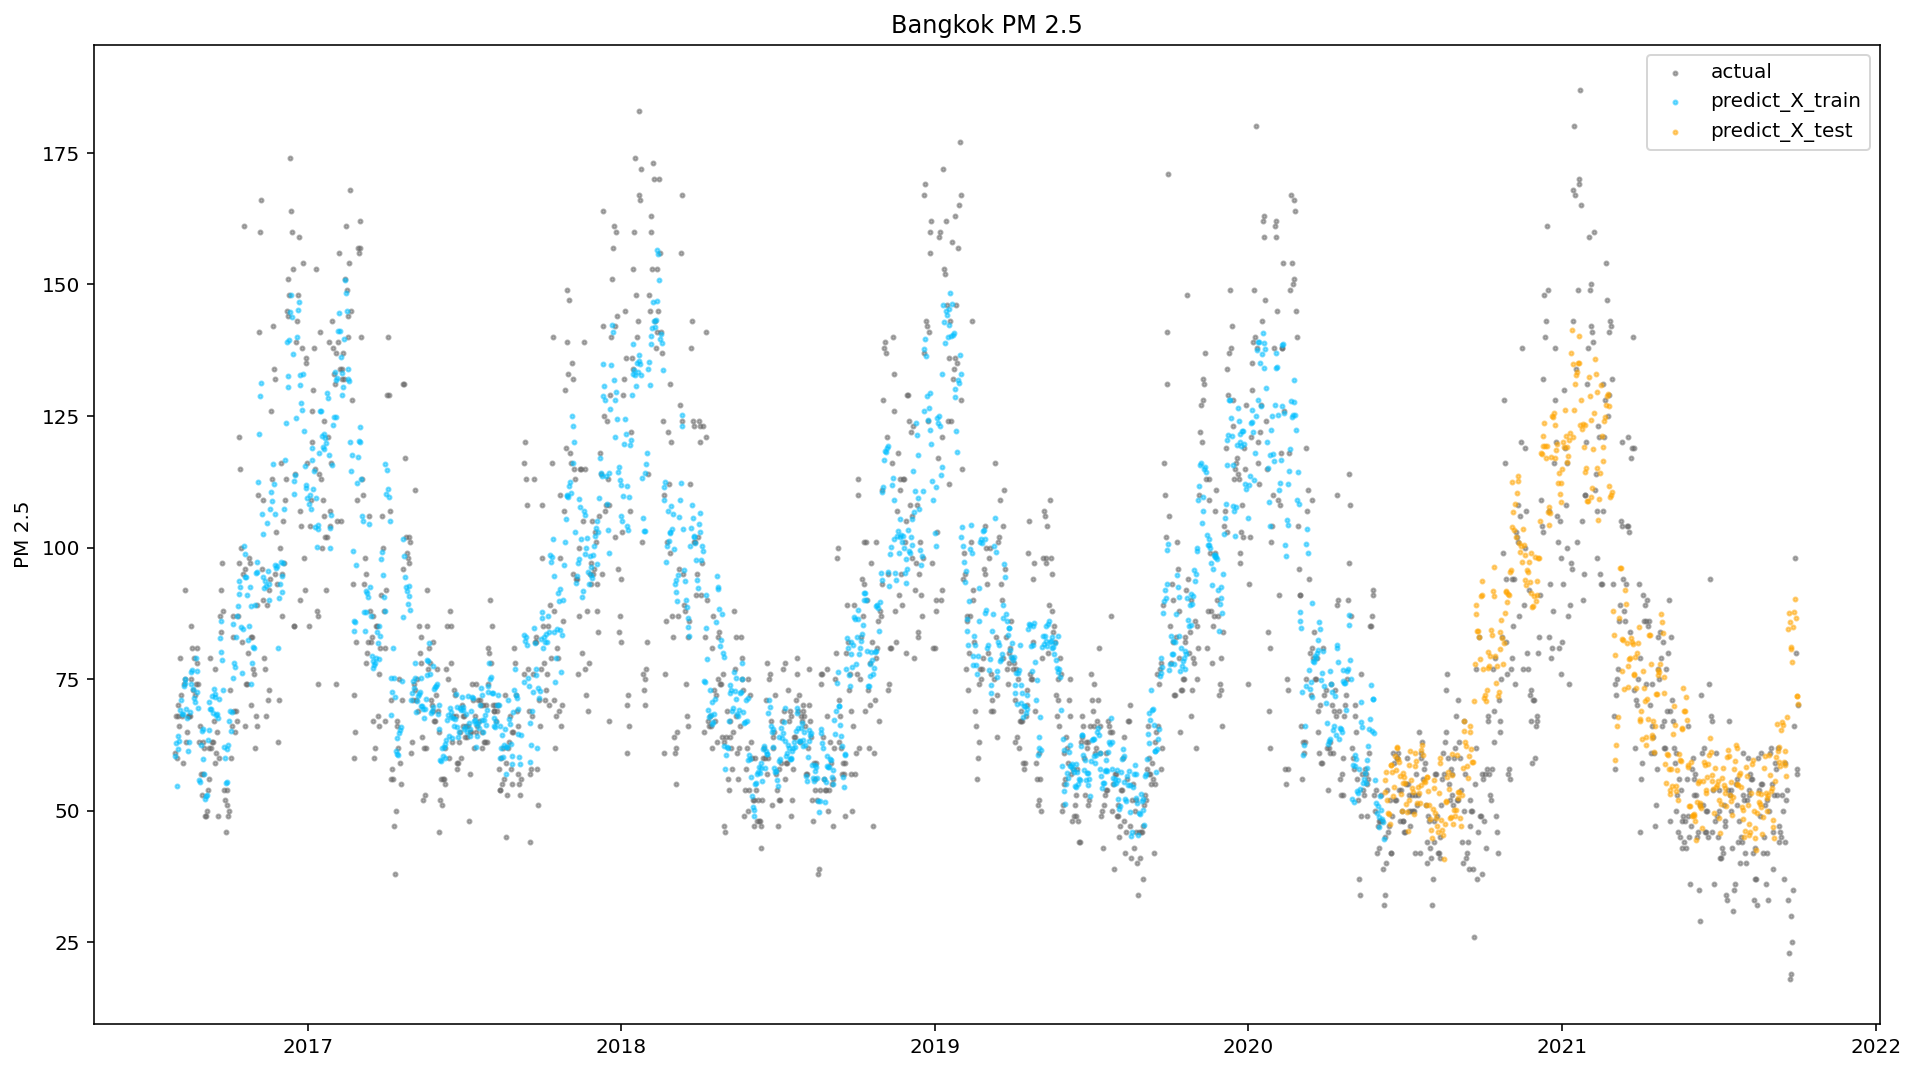

In [36]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Bangkok PM 2.5')
plt.legend();